# TITANIC TRAGEDY & HOW TO CHOOSE THE BEST CRUISE TOUR

<img src="https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/508de660e4b044ecf46bc6b2/1351476833467/Titanic-Route.jpg?format=750w">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Combine data files to have a larger dataframe
data_train = pd.read_csv('train_titanic.csv')
data_test = pd.read_csv('test_titanic.csv')
data = data_train.append(data_test, sort=False)

## 1. Exploring dataset

In [3]:
data.shape

(1309, 12)

Adv@1

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.count() # the total number of ROW that has value in each column

PassengerId    1309
Survived        891
Pclass         1309
Name           1309
Sex            1309
Age            1046
SibSp          1309
Parch          1309
Ticket         1309
Fare           1308
Cabin           295
Embarked       1307
dtype: int64

Observation: 
 - Missing >300 passengers'ages --> processsing the dataframe before playing with AGE category is a must.
 - Info of all passengers' Tickets-Fares-Pclass are recorded, but not all the Cabin number: maybe each passenger's cabin was assigned on board, not when they bought the ticket so we don't have this info fully stored. 
 - "Survived" column has only 891 values of TRAIN_data_file since the TEST_data_file doesn't have that column --> remember it when playing with survival rate.

In [7]:
data.nunique() #the total number of unique_value in each column 

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

--> Seems that all columns have correct unique values. 

In [8]:
data['Age'].unique() 

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 ,
       18.5 , 67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

Observation:
- look at value "nan" in the array 0___0
- Age values are floating numbers not interger

## 2. Processing data

In [9]:
#Clean data:
clear=data.replace('nan','') #replace row with "nan" string value by empty value,
#in column "Age" drop all the row that has missing value, inc the empty row we just did in the step above.
age_df= clear.dropna(subset=['Age']) 
age_df.shape

(1046, 12)

*Observation:  
Attention: if we use dropna() WITHOUT the subset attribute we gonna drop ALL the row that has at least ONE missing value in EACH column, which leads to a horrible dataset that has only 183 row. 


## 3. Survival rate by Gender

Attention: Since only the train_data_set has Survival info, we only use this dataset in this part - not the combine dataset.

In [22]:
train= data_train['Sex'].value_counts()
print(train)

male      577
female    314
Name: Sex, dtype: int64


In [23]:
survival = data_train.groupby('Sex')['Survived'].value_counts()
print(survival)

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64


In [31]:
s_male = round((109/577)*100, 0)
s_female = round((233/314)*100,0)
d_male = 100-s_male
d_female = 100-s_female
print('% Male survival:', s_male, 'VS % Male death', d_male)
print('% Female survival:',s_female, 'VS % Female death:',d_female)


% Male survival: 19.0 VS % Male death 81.0
% Female survival: 74.0 VS % Female death: 26.0


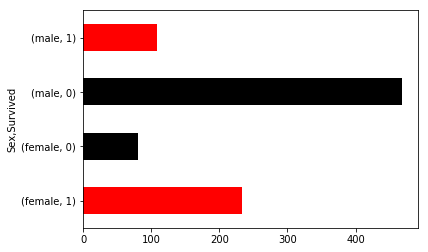

In [33]:
survival.plot.barh(stacked=True,color=['r','black','black','r'])

## 4. Survival rate by Age group

(array([12., 10., 12.,  7., 10.,  0.,  5.,  6.,  4.,  6.,  0., 10.,  4.,
         4.,  4.,  0.,  5., 10.,  6., 19.,  0., 20., 42., 29., 23.,  1.,
        41., 44., 26., 48.,  1., 34., 31., 30., 32.,  3., 30., 42., 23.,
        24.,  4., 21., 16., 25., 31.,  2.,  9., 14., 21., 18.,  3., 11.,
        18.,  9., 10.,  0., 23.,  6., 14., 14.,  0.,  9., 15.,  8.,  6.,
         0.,  4., 10.,  8.,  5.,  0.,  5.,  6.,  3.,  7.,  1.,  5.,  5.,
         4.,  5.,  0.,  3.,  1.,  1.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.17  ,  0.9683,  1.7666,  2.5649,  3.3632,  4.1615,  4.9598,
         5.7581,  6.5564,  7.3547,  8.153 ,  8.9513,  9.7496, 10.5479,
        11.3462, 12.1445, 12.9428, 13.7411, 14.5394, 15.3377, 16.136 ,
        16.9343, 17.7326, 18.5309, 19.3292, 20.1275, 20.9258, 21.7241,
        22.5224, 23.3207, 24.119 , 24.9173, 25.7156, 26.5139, 27.3122,
        28.1105, 28.9088, 29.7071, 30.5054, 31.3037, 32.102 , 32.9003,
        

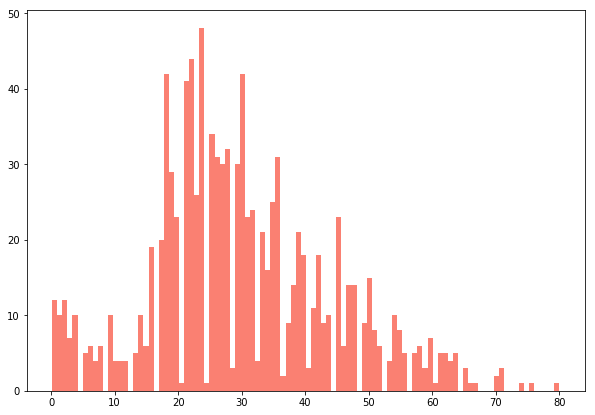

In [26]:
# Age chart
a = age_df['Age']
plt.figure(figsize=(10,7))
plt.hist(a,bins=100, color='salmon')

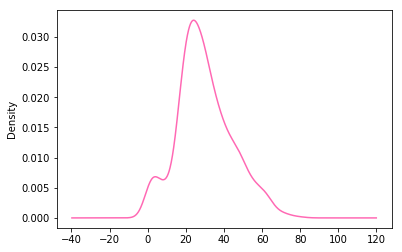

In [14]:
age_df['Age'].plot.kde(color='hotpink')

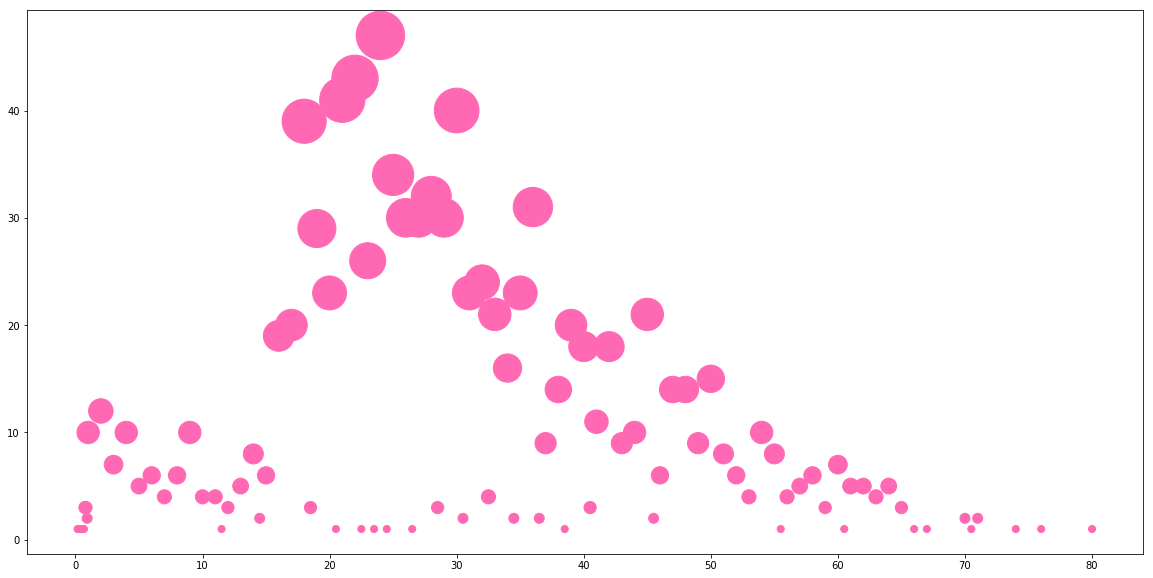

In [18]:
y=age_df['Age'].value_counts()
plt.figure(figsize=(20,10))
plt.scatter(y.index,y.values,y.values*50, color='hotpink')

### Age grouping


In [15]:
age_df['Age group']=np.nan
age_df.head(5)

/Users/chhquyen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age group
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [16]:
age_df.loc[age_df['Age']<10,'Age group']='Kids'
age_df.loc[(age_df['Age']>=10) & (age_df['Age']<18),'Age group']='Ados'
age_df.loc[(age_df['Age']>=18)&(age_df['Age']<35),'Age group']='Young adult'
age_df.loc[(age_df['Age']>=35)&(age_df['Age']<55),'Age group']='Middle age'
age_df.loc[(age_df['Age']>=55),'Age group']='Elders'
age_df.head(5)

/Users/chhquyen/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age group
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young adult
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Middle age
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young adult
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Middle age
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Middle age


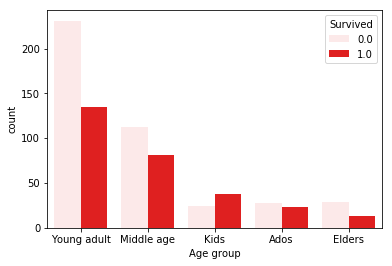

In [13]:
sns.countplot('Age group', hue='Survived', data=age_df, color='r')

## Extra plot

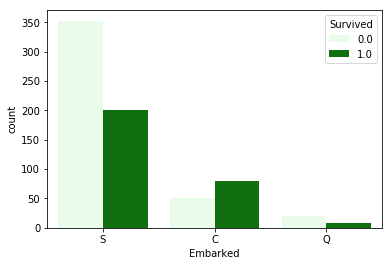

In [26]:
sns.countplot('Embarked', hue='Survived', data=age_df, color='g')

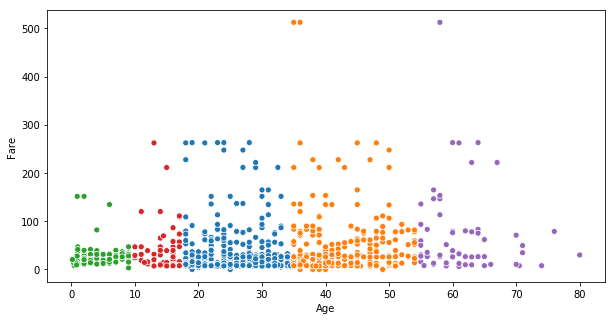

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Age", y='Fare',hue='Age group',data=age_df, color='g',legend = False)

Observation: 
- most of passenger bought cheap ticket even though Titanic is a prestigious cruise ship one. Why? -> beside a few wealthy families wanted to go travel, most of passengers were worker class who wanted to go to USA to change their lives. 